In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


All columns have no null values and in correct datatypes.

In [4]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


The table above provides the descriptive statistics for the dataset, including measures such as mean, standard deviation, min, and max values for each column.

Key observations:
- The average temperature is around 32°C.
- The relative humidity (RH) varies significantly, with a mean of 62%.
- Wind speed (Ws) ranges from 6 km/h to 29 km/h.
- The dataset includes both fire and non-fire instances.

These statistics give us a preliminary understanding of the data distribution and variability.

## Explanatory Data Analysis and Data Visualization

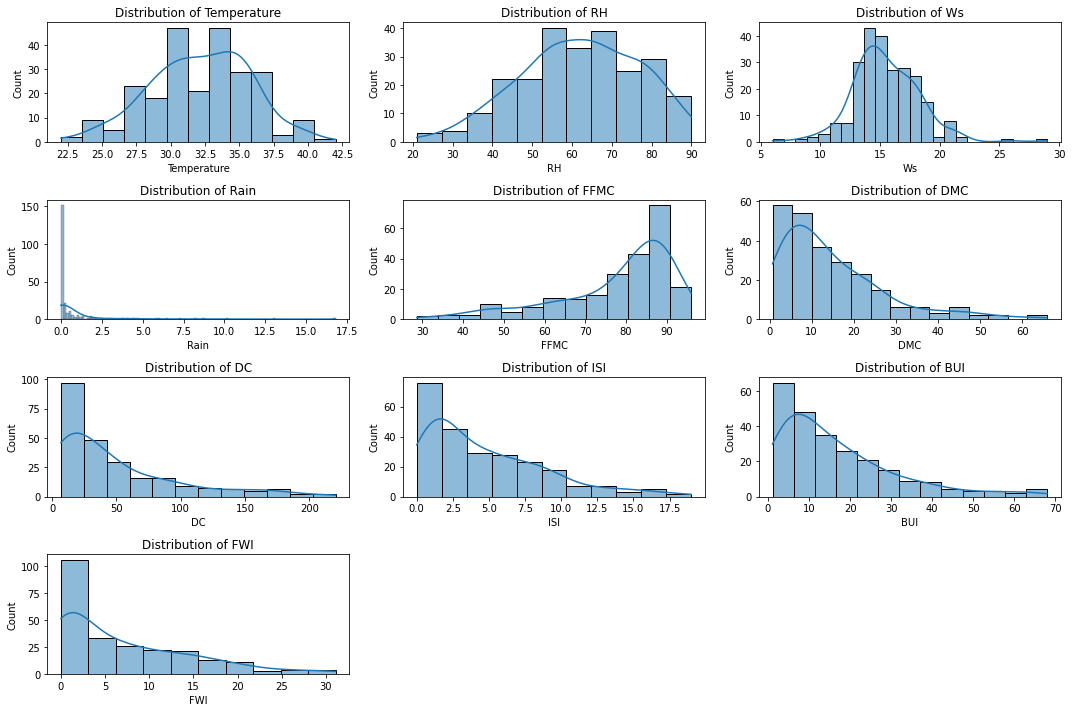

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for numerical features
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

The Rain feature shows a high frequency of zero values, indicating many days without rain.
Many features such as Rain, DMC, DC, ISI, BUI, and FWI are right-skewed, suggesting that most observations have lower values with few high values.

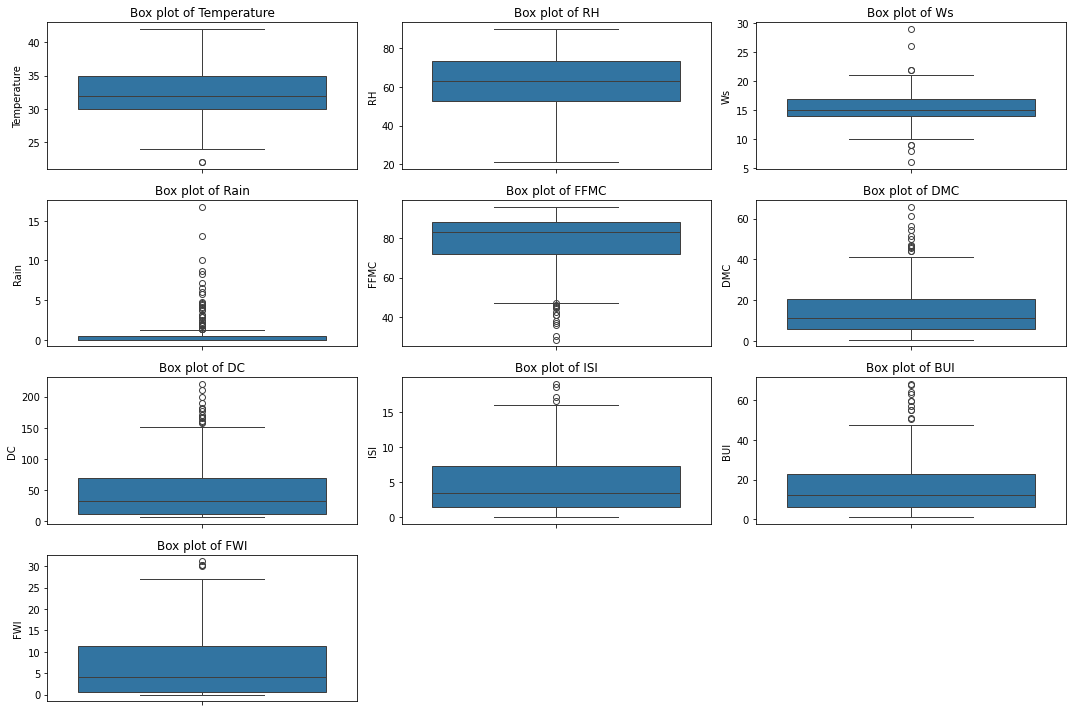

In [6]:
# Create box plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

The median values for most features lie within the IQR, providing robust measures of central tendency. The spread of the data varies across features, with some showing wider IQRs (e.g., DMC, DC), indicating more variability.

Features like Rain, ISI, BUI, and FWI have significant outliers, indicating occasional extreme values. 

For further analysis, we will not remove the outliers since this is a forest fire prediction. Outliers might represent rare or critical events such as extreme weather conditions that could significantly impact forest fire risk. 

## Feature Selection and Feature Engineering

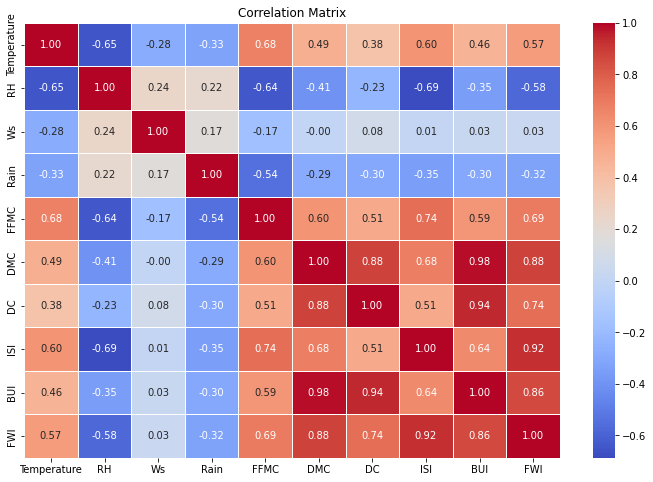

In [7]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Since BUI, DMC and DC are highly correlated, the same with FWI and ISI, we can remove the some of these features to prevent multicollinearity.

In [8]:
# Remove highly correlated features
df.drop(['DC', 'BUI', 'ISI'], axis=1, inplace=True)

In [9]:
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'FWI']

In [10]:
df['month'].value_counts()

month
8    62
7    61
6    60
9    60
Name: count, dtype: int64

In [11]:
df['year'].value_counts()

year
2012    243
Name: count, dtype: int64

Since the data is only year 2012, we can remove this column.

In [12]:
df.drop(['year'], axis=1, inplace=True)

In [13]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,0.5,not fire,0


## Data Transformation

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('FWI', axis=1)
y = df['FWI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Encode the categorical variable 'Classes' using Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_class_train = label_encoder.fit_transform(X_train['Classes'])
X_class_test = label_encoder.transform(X_test['Classes'])

Robust scaling is a suitable method for preprocessing data with outliers for FWI prediction. By using robust scaling, the robustness and performance of predictive models will be improved. This approach is particularly advantageous since the dataset includes significant variations and extremes that are meaningful for the prediction task.

In [16]:
from sklearn.preprocessing import RobustScaler

X_num_train = X_train.drop("Classes", axis=1)
X_num_test = X_test.drop("Classes", axis=1)
scaler = RobustScaler()
scaler.fit(X_num_train)

X_num_train = scaler.transform(X_num_train)
X_num_test = scaler.transform(X_num_test)

In [17]:
X_train = np.concatenate((X_num_train, X_class_train.reshape(-1, 1)), axis=1)
X_test = np.concatenate((X_num_test, X_class_test.reshape(-1, 1)), axis=1)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,Classes,Region
0,0.507937,1.0,-0.8,0.095238,1.333333,1.263158,-0.853933,-0.362480,-1.0,5.0
1,0.634921,0.0,0.0,-1.238095,0.333333,0.000000,0.488764,3.186010,0.0,2.0
2,-0.571429,-1.0,1.0,-0.952381,-0.666667,1.052632,0.084270,0.114467,0.0,2.0
3,-0.317460,-2.0,-0.4,-1.000000,2.000000,0.000000,0.398876,0.445151,0.0,2.0
4,0.507937,0.0,0.2,0.047619,-0.333333,0.000000,0.303371,1.863275,-1.0,2.0


In [18]:
X_train.shape, X_test.shape

((194, 10), (49, 10))

# Model Training and Evaluation with various models

For the evaluation, these metrics will be used:

- **Mean Squared Error (MSE)**: The average of the squares of the errors. It measures the average squared difference between actual and predicted values.
- **Root Mean Squared Error (RMSE)**: The square root of the MSE. It provides a measure of the average magnitude of the errors.
- **Mean Absolute Error (MAE)**: The average of the absolute errors. It measures the average magnitude of the errors without considering their direction.
- **R-squared (R2)**: The proportion of the variance in the dependent variable that is predictable from the independent variables.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Rsquared:", r2)

Mean Squared Error: 6.132774538270783
Root Mean Squared Error: 2.4764439299670773
Mean Absolute Error: 1.8509356010658997
Rsquared: 0.7976544393747887


In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Fit the polynomial regression model
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

polynomial_regression = LinearRegression()  
polynomial_regression.fit(X_train_poly, y_train)

LinearRegression()

In [22]:
y_pred_poly = polynomial_regression.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Rsquared:", r2)

Mean Squared Error: 1.4043738758598054
Root Mean Squared Error: 1.1850628151536127
Mean Absolute Error: 0.8198209248199088
Rsquared: 0.9536639057143004


In [23]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.62, random_state=42)  
lasso.fit(X_train, y_train) 
lasso_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Rsquared:", r2)

Mean Squared Error: 6.952844359092822
Root Mean Squared Error: 2.636824673559625
Mean Absolute Error: 2.022138202610243
Rsquared: 0.7705969490642383


In [24]:
# Ridge Regression
ridge = Ridge(alpha=0.00001, random_state=42)
ridge.fit(X_train, y_train) 
ridge_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Rsquared:", r2)

Mean Squared Error: 6.132774813677737
Root Mean Squared Error: 2.4764439855724047
Mean Absolute Error: 1.85093574803545
Rsquared: 0.7976544302879758


In [25]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
enet.fit(X_train, y_train)

y_pred = enet.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Rsquared:", r2)

Mean Squared Error: 6.441863175302675
Root Mean Squared Error: 2.538082578503441
Mean Absolute Error: 1.9734316345208667
Rsquared: 0.7874563286904954


Hyperparameter Tuning for Elastic Net

In [26]:
from sklearn.model_selection import GridSearchCV

model = ElasticNet(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'alpha': [0.1, 0.3, 0.5],
    'l1_ratio': [0.5, 0.7, 0.9]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('best_params:', best_params)

best_params: {'alpha': 0.1, 'l1_ratio': 0.9}


In [27]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Rsquared:", r2)

Mean Squared Error: 6.542983369288421
Root Mean Squared Error: 2.5579255988570937
Mean Absolute Error: 1.9560884070220395
Rsquared: 0.784119955860402


Hyperparameter Tuning for Polynomial Features Linear Regression 

(This model has the highest metric performance compared to other models so tuning is run for this model)

In [28]:
from sklearn.pipeline import make_pipeline

param_grid = {'polynomialfeatures__degree': [1, 2, 3]}
model = make_pipeline(PolynomialFeatures(), LinearRegression())

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_params

{'polynomialfeatures__degree': 2}

In [29]:
y_pred = best_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Rsquared:", r2)

Mean Squared Error: 1.4043738758598054
Root Mean Squared Error: 1.1850628151536127
Mean Absolute Error: 0.8198209248199088
Rsquared: 0.9536639057143004


After training and testing with multiple models, polynomial features regression results to be the best model for FWI prediction.

An MSE of 1.40 means that on average, the squared difference between the predicted and actual FWI values is 1.40. This gives a sense of the overall error magnitude but is not directly interpretable in the same units as FWI.

An RMSE of 1.19 means that the average prediction error is about 1.19 units of the FWI. This gives a clearer picture of how much the predictions deviate from the actual FWI values.

An MAE of 0.82 means that on average, the predictions are off by about 0.82 units of the FWI. This metric is particularly useful for understanding the average prediction error without emphasizing larger errors.

R-squared of 0.95 shows that the model explains 95% of the variance in the FWI data, indicating a strong model performance.

## Polynomial Linear Regression: Predicted vs Actual Values

To analyze how well the Polynomial Linear Regression model predicts the actual values, we visualize the predicted values against the actual values.

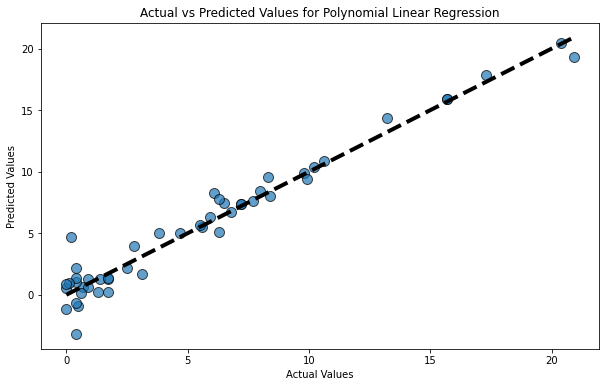

In [30]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Polynomial Linear Regression')
plt.show()

Interpretation of Predicted vs Actual Values

In the scatter plot:
- Each point represents a test sample where the x-coordinate is the actual value, and the y-coordinate is the predicted value.
- The diagonal line \(y = x\) represents the ideal scenario where predicted values exactly match the actual values.

Analysis:
- **Points on the Diagonal Line**: Indicate perfect predictions where the predicted values exactly match the actual values.
- **Points Above the Line**: Indicate overestimation by the model.
- **Points Below the Line**: Indicate underestimation by the model.

The plot indicates that the Polynomial Linear Regression model generally makes accurate predictions, as evidenced by the clustering of points around the diagonal line.
There are some prediction errors, as shown by the points that deviate from the diagonal, but these errors appear to be relatively small for most points.
The presence of a few outliers suggests that while the model performs well overall, it may struggle with certain data points, leading to higher errors for these cases.


Create pickle file for the polynomial regression model.

In [31]:
import pickle

# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(polynomial_regression, file)

## Decision Tree Regressor

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_train['Classes'] = label_encoder.fit_transform(X_train['Classes'])
X_test['Classes'] = label_encoder.transform(X_test['Classes'])

In [70]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict the target variable
y_pred = decision_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Rsquared:", r2)

Mean Squared Error: 3.828979591836733
Root Mean Squared Error: 1.9567778596040821
Mean Absolute Error: 1.2081632653061223
Rsquared: 0.8736661494242449


In [92]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Define the hyperparameter grid
param_grid = {
    'max_depth': [6, 8, 10, 12, None],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 3, 4],
    'max_features': [None],
    'ccp_alpha': [0.0, 0.1]
}

# Perform Randomized Search CV with cross-validation
random_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5,\
                              scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_
print('best_params:', best_params)

best_params: {'ccp_alpha': 0.0, 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [93]:
y_pred = best_model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Rsquared:", r2)

Mean Squared Error: 3.677303007138228
Root Mean Squared Error: 1.9176295281253437
Mean Absolute Error: 1.1681559766763847
Rsquared: 0.8786705863838972


The Decision Tree Regressor seems to perform well with an R² of 0.88, indicating that the model captures the majority of the variance in the target variable.
The RMSE of 1.92 and MAE of 1.17 suggest that the typical prediction errors are relatively low but still present.

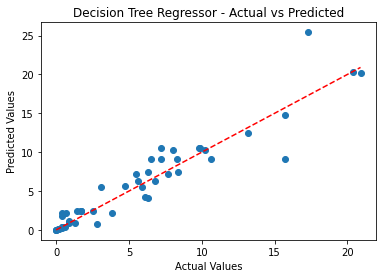

In [94]:
# Predict the target variable using the Decision Tree Regressor
y_pred = best_model.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor - Actual vs Predicted')
plt.show()

The majority of the data points are concentrated near the origin, indicating that the model performs well for lower actual values. There are several outliers, especially as the actual values increase. This suggests that the Decision Tree Regressor may be struggling to predict higher values accurately. The general trend seems to follow the red line, indicating that the model has captured the overall relationship between the features and the target variable reasonably well.
